In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r'X:\Downloads\PRG4206 Machine Learning\Group\depress.csv')

In [3]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [4]:
#preprocessing data
#take out rows with null values
df = df.dropna()

#separate into data (fetures only) and target (goal)
data = df.drop(columns=['depressed'])  #features only. remove the target column
target = df['depressed'].values   #the target only aka 'depressed or not?'

In [5]:
from sklearn.model_selection import train_test_split

#dividing data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0)

print("Shape of X_test: {}".format(X_test.shape))
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_test: {}".format(y_test.shape))
print("Shape of y_train: {}".format(y_train.shape))

Shape of X_test: (423, 22)
Shape of X_train: (986, 22)
Shape of y_test: (423,)
Shape of y_train: (986,)


In [6]:
#building random forest model with hyperparameters

#generating random estimators
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [7]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [8]:
#create model
rf_Model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=50)

In [9]:
#using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, n_iter = 100, cv =100, verbose=2, n_jobs = 10)

In [10]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 100 folds for each of 100 candidates, totalling 10000 fits


RandomizedSearchCV(cv=100,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=10,
                                                    random_state=50),
                   n_iter=100, n_jobs=10,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [11]:
rf_RandomGrid.best_params_

{'n_estimators': 72,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': False}

In [12]:
print('With RandomizedSearch')
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

With RandomizedSearch
Train Accuracy - : 0.836
Test Accuracy - : 0.839


In [13]:
#use the forest's predict method on the test data
prediction = rf_RandomGrid.predict(X_test)

print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
#import scikit-learn metrics module for accuract testing
from sklearn import metrics

#model accuracy, how often is the classifier correct?
#compare predicted values to the actual target value in y_test set

print("Accuracy (Optimized - RandomizedSearch): ", metrics.accuracy_score(y_test, prediction))

Accuracy (Optimized - RandomizedSearch):  0.8392434988179669


In [15]:
#Evaluation metrics
#Constructing the confusion matrix.
from sklearn. metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[355,   0],
       [ 68,   0]], dtype=int64)

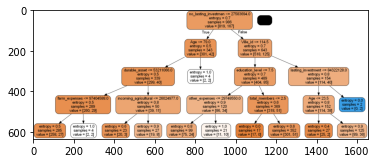

In [16]:
from sklearn.tree import export_graphviz
import pydot
import pydotplus

feature_list = list(data.columns)

tree = rf_RandomGrid.best_estimator_[5]
export_graphviz(tree, out_file = "tree.dot", filled = True, feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')

graph.write_png('RandomForestOptimizedRandomizedSearch.png')

#display the image
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
img=pltimg.imread('RandomForestOptimizedRandomizedSearch.png')
imgplot = plt.imshow(img)
plt.show()

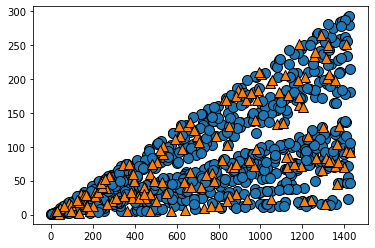

In [17]:
import mglearn

mglearn.discrete_scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train)

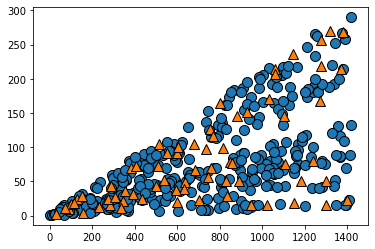

In [18]:
mglearn.discrete_scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test)

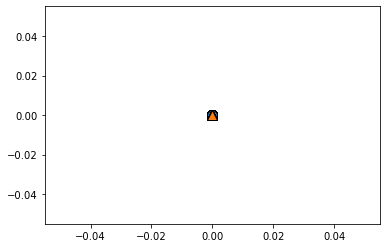

In [19]:
mglearn.discrete_scatter(prediction, prediction, y_test)

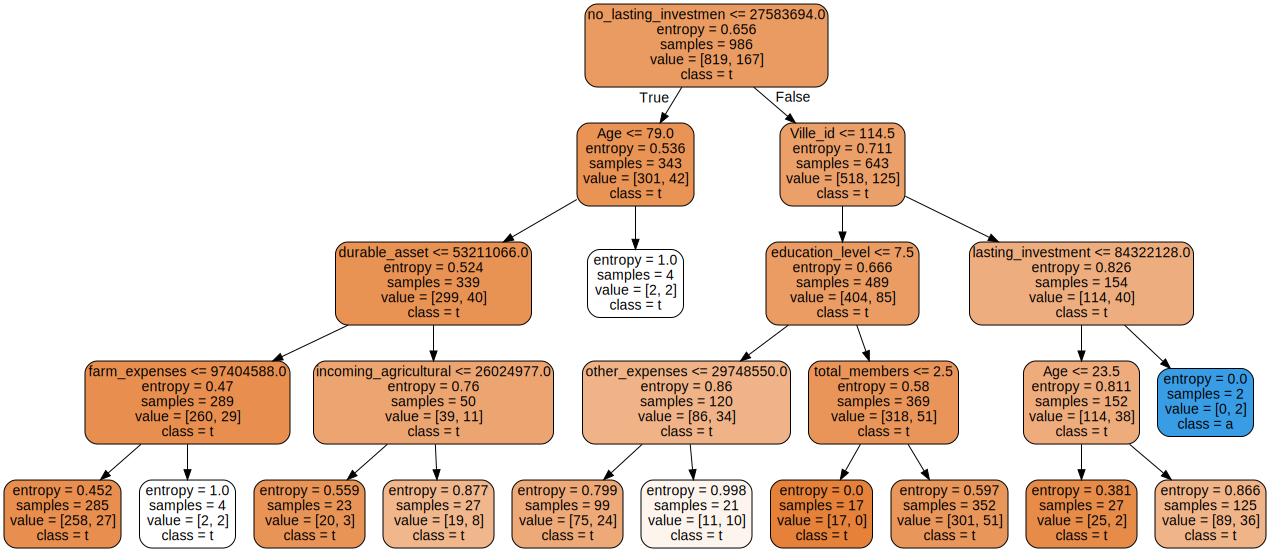

In [20]:
import graphviz
from sklearn.tree import export_graphviz


dot_data = export_graphviz(rf_RandomGrid.best_estimator_[5], 
                           feature_names=feature_list,
                           class_names="target", 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[355,   0],
       [ 68,   0]], dtype=int64)